<a href="https://colab.research.google.com/github/Stephen-LiuHan/BlockChain/blob/master/DeepLearningHandsOn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install h5py
!pip install tensorflow
!pip install keras

In [0]:
!ls

sample_data


In [0]:
from keras.models import Sequential
from keras.layers import Dense

model =Sequential()

model.add(Dense(1,input_dim=8,kernel_initializer='random_uniform'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 9         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [0]:
import os
from time import gmtime, strftime
from keras.callbacks import TensorBoard

def make_tensorboard(set_dir_name=""):
  tictoc = strftime("%a_%d_%b_%Y_%H_%M_%S",gmtime())
  directory_name = tictoc
  log_dir = set_dir_name+'_'+directory_name
  os.mkdir(log_dir)
  tensorboard = TensorBoard(log_dir=log_dir)
  return tensorboard

In [9]:
from __future__ import print_function
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.optimizers import SGD
from keras.utils import np_utils

NB_EPOCH =50
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES =10
OPTIMIZER = SGD()
N_HIDDEN = 128
VALIDATION_SPLIT = 0.2
DROPOUT=0.3

(X_train,y_train),(X_test,y_test)=mnist.load_data()

RESHAPED=784

X_train=X_train.reshape(60000,RESHAPED)
X_test= X_test.reshape(10000,RESHAPED)
X_train=X_train.astype('float32')
X_test =X_test.astype('float32')

X_train/= 255
X_test /= 255

print(X_train.shape[0],'train samples')
print(X_test.shape[0],'test samples')

Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test,NB_CLASSES)

model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

callbacks = [make_tensorboard(set_dir_name='keras_MNIST_V1')]

model.compile(loss='categorical_crossentropy',optimizer=OPTIMIZER,
             metrics=['accuracy'])

model.fit(X_train,Y_train,batch_size=BATCH_SIZE,epochs=NB_EPOCH,
         callbacks=callbacks,verbose=VERBOSE,validation_split=VALIDATION_SPLIT)
score = model.evaluate(X_test,Y_test,verbose=VERBOSE)
print("¥nTest score:",score[0])
print("Test accuracy:",score[1])

60000 train samples
10000 test samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_6 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_7 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 1

In [5]:
%whos

Variable           Type                          Data/Info
----------------------------------------------------------
Activation         type                          <class 'keras.layers.core.Activation'>
BATCH_SIZE         int                           128
Dense              type                          <class 'keras.layers.core.Dense'>
NB_CLASSES         int                           10
NB_EPOCH           int                           50
N_HiDEN            int                           128
OPTIMIZER          SGD                           <keras.optimizers.SGD object at 0x7f6ac14e9908>
RESHAPED           int                           784
SGD                type                          <class 'keras.optimizers.SGD'>
Sequential         type                          <class 'keras.engine.sequential.Sequential'>
TensorBoard        type                          <class 'keras.callbacks.TensorBoard'>
VALIDATION_SPLIT   float                         0.2
VERBOSE            int               

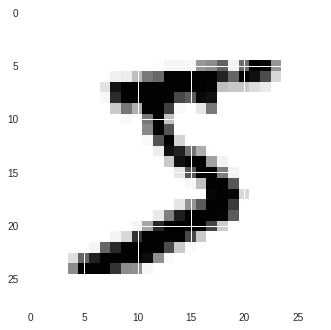

In [6]:
from matplotlib import pyplot as plt

plt.imshow(X_train[0,:].reshape(28,28))
plt.show()